## 1) ABSTRACT - Proyecto de Data Science (Predicción de una enfermedad coronaria)

#### En este estudio, presentamos un dataset que tiene como fin para predecir la presencia de enfermedad coronaria utilizando técnicas de Data Science. La enfermedad coronaria es una afección cardiovascular grave que afecta a millones de personas en todo el mundo y representa una de las principales causas de morbimortalidad. El objetivo principal de este proyecto es desarrollar un modelo predictivo preciso y confiable que pueda identificar tempranamente a los individuos en riesgo de desarrollar enfermedad coronaria, lo que permitiría una intervención médica oportuna y potencialmente reducir las complicaciones asociadas.

#### El dataset utilizado en este estudio contiene una amplia variedad de características clínicas, recopiladas de una población diversa de pacientes. Estas características incluyen datos como la edad (AGE), el género (SEX), tipo de dolor en el pecho (CP), presión sanguinea (trestbps), colesterol (CHOL), nivel de azúcar en sangre (FBS), resultado de electrocardiograma en reposo (RESTECG), frecuencia cardíaca máxima alcanza durante una prueba de esfuerzo (THALACH), paciente con angina (EXANG), descenso del segmento ST (OLDPEAK), pendiente del segmente ST durante la parte más exigente del ejercicio (SLOPE), resultado del flujo sanguineo con tinte radioactivo (THAL), número de vasos sanguineos principales coloreados por tinte radioactivo (CA), la variable objetivo en el dataset indica la presencia o ausencia de enfermedad coronaria (TARGET).

#### Para abordar este problema, se aplicarán diversas técnicas de Data Science, donde compararemos varios modelos y veremos como se comparta cada uno y cual tiene más probabilidad de exitos dado lo que buscamos predecir

#### El análisis de este dataset y el desarrollo del modelo predictivo tienen el potencial de proporcionar una valiosa herramienta para la detección temprana y la prevención de la enfermedad coronaria. Los resultados obtenidos podrían ayudar a los profesionales de la salud a identificar de manera más precisa a las personas con alto riesgo y a implementar estrategias de intervención adecuadas. Además, este estudio también puede revelar relaciones y patrones ocultos entre las características estudiadas, lo que podría conducir a una mejor comprensión de los factores de riesgo asociados con la enfermedad coronaria

*************************************************************************************

## 2) Preguntas / Hipotesís

#### En nuestro caso buscamos responder algunas de las siguientes preguntas que por lo general suelen darse con respecto a este tipo de afección para entender como la misma afecta a la población;

#### 1) Cuál es el porcentaje de personas que tienen algún tipo de afección coronaria?
#### 2) Los hombres son más propensos a tener afecciones cardiacas?
#### 3) Que tipo de variables nos pueden ayudar a hacer una prevención temprana?
#### 4) El tipo de dolor en el pecho presentado por los pacientes, nos da indicios de una afección coronaria?
#### 5) Los paciente con un alto colesterol en sangre, son más propensos a tener afecciones cardíacas?

#### El proyecto consiste en analizar el conjunto de datos de pacientes con cardiopatías y procesarlos adecuadamente. A través de distintos modelos que buscamos entrenar para redecir la presencia de una enfermedad cardíaca en un paciente, es decir, hablamos de un problema de clasificación, con características de entrada como una variedad de parámetros, y la variable objetivo como una variable binaria, prediciendo si la enfermedad cardíaca está presente o no.

*******************************************

## Contexto Comercial

####  El objetivo comercial de este proyecto es proporcionar una solución basada en datos que permita a las organizaciones comerciales identificar a las personas con mayor riesgo de enfermedad coronaria, con el fin de tomar medidas preventivas y ofrecer programas de salud personalizados para mejorar la salud de sus empleados y reducir los costos asociados, consiguiendo los siguientes beneficios:

#### * Identificación temprana de personas con alto riesgo de enfermedad coronaria, lo que permite la implementación de medidas preventivas y tratamientos personalizados.
#### * Reducción de costos para las compañías de seguros y proveedores de atención médica al detectar y tratar la enfermedad en etapas tempranas, evitando complicaciones más graves y costosas.
#### * Mejora de la calidad de vida de los pacientes al recibir un diagnóstico temprano y un tratamiento adecuado.

*****************************************************************

## 3) Data Wrangling & EDA (Exploratory Data Analysis)

### Primero importamos las librerias a utilizar

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

### Importamos el dataset a utilizar

In [3]:
datasetI = pd.read_csv('dataset.csv')

#### Con la función info(), nos va a dar una descripción general de nuestro conjunto de datos, lo que nos va a ayudar a entender mejor su estructura y a tomar decisiones sobre cómo manipular o limpiar los datos en función de la información que obtenemos

In [4]:
datasetI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Hacemos un shape para entender la dimensión del dataset con el cual vamos a trabajar

In [5]:
datasetI.shape

(303, 14)

#### Posteriormente hacemos un describe para generar estadísticas descriptivas que nos proporcionarán información útil sobre los datos con los cuales vamos a trabajar

In [6]:
datasetI.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

### Analizamos la variable "target"

In [7]:
datasetI["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [8]:
datasetI["target"].unique()

array([1, 0], dtype=int64)

##### Podemos observar que la variable objetivo tiene dos valores "0" y "1".

In [9]:
datasetI.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

### Verifcamos la correlación entre columnas

In [10]:
print(datasetI.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


###### Esto muestra que la mayoría de las columnas están moderadamente correlacionadas con nuestro objetivo, pero 'fbs' está débilmente correlacionada.

### Ahora verificamos "target" en la población de nuestro dataset e intentamos responder una de las preguntas que nos planteamos al principio:

#### 1) Cuál es el porcentaje de personas que tienen algún tipo de afección coronaria?

<Axes: xlabel='target', ylabel='target'>

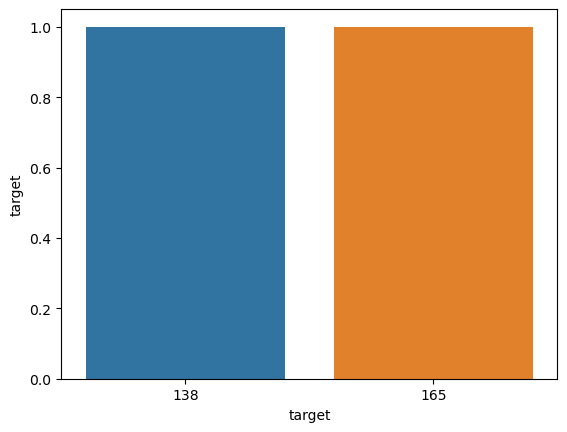

In [11]:
sns.barplot(x=datasetI.target.value_counts(), y="target", data=datasetI)


In [12]:
print("Porcentaje de personas sin problemas del corazón: "+str(round(datasetI.target.value_counts()[0]*100/303,2)))
print("Porcentaje de personas con problemas del corazón: "+str(round(datasetI.target.value_counts()[1]*100/303,2)))


Porcentaje de personas sin problemas del corazón: 45.54
Porcentaje de personas con problemas del corazón: 54.46


***** En este caso vemos que más del 50% de nuestra población de estudio sufre algún tipo de afección

### Analizamos la variables "sex" y avanzamos con la segunda respuesta a las consultas iniciales que nos inicimos:
#### 2) Los hombres son más propensos a tener afecciones cardiacas?

<Axes: xlabel='target', ylabel='sex'>

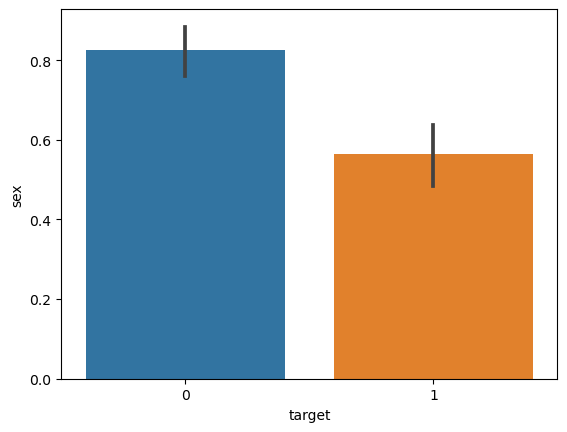

In [13]:
sns.barplot(x= "target", y="sex", data=datasetI)


##### 0 = mujeres; 1 = hombres
    

**** Tal como se puede observar esto no es correcto, ya que vemos claramente que hay un registro mayor de mujeres que de hombres con problemas cardiacos

### Hacemos lo mismos pero ahora con Matplotlib 

Text(0.5, 1.0, 'Count of each Target Class')

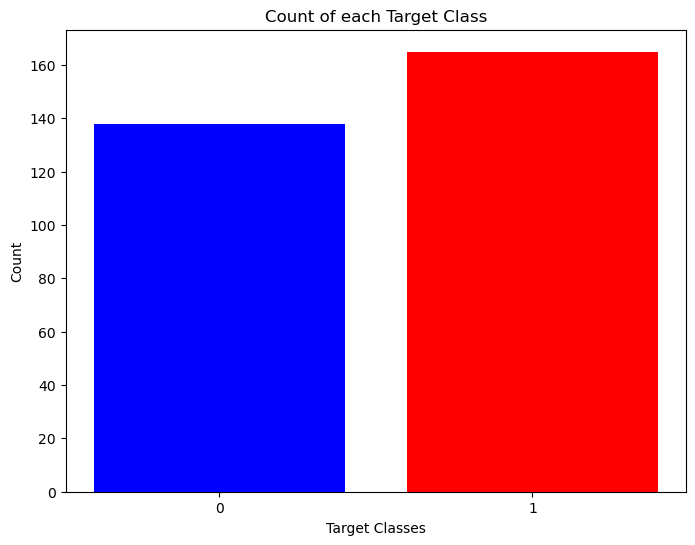

In [14]:

rcParams['figure.figsize'] = 8,6
plt.bar(datasetI['target'].unique(), datasetI['target'].value_counts(), color = ['red', 'blue'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

### Analizamos la variables "ca" (número de vasos sanguineos principales coloreados por tinte radioactivo)

<Axes: xlabel='ca', ylabel='target'>

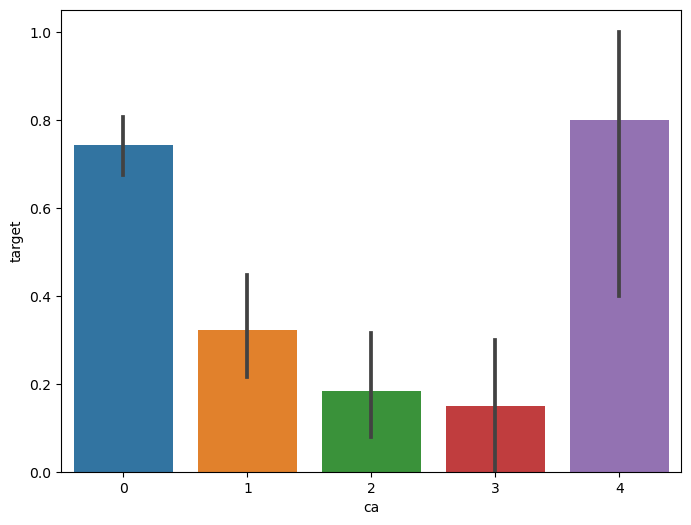

In [15]:
sns.barplot(x= "ca", y="target", data=datasetI )

In [16]:
print("ca: número de vasos principales (0-3) coloreados por fluoroscopia")
print("ca = 4 tiene un número asombrosamente grande de pacientes cardíacos")

ca: número de vasos principales (0-3) coloreados por fluoroscopia
ca = 4 tiene un número asombrosamente grande de pacientes cardíacos


### Analizamos el compartamiento de "thal" (resultado del flujo sanguineo con tinte radioactivo)

<Axes: xlabel='thal', ylabel='Density'>

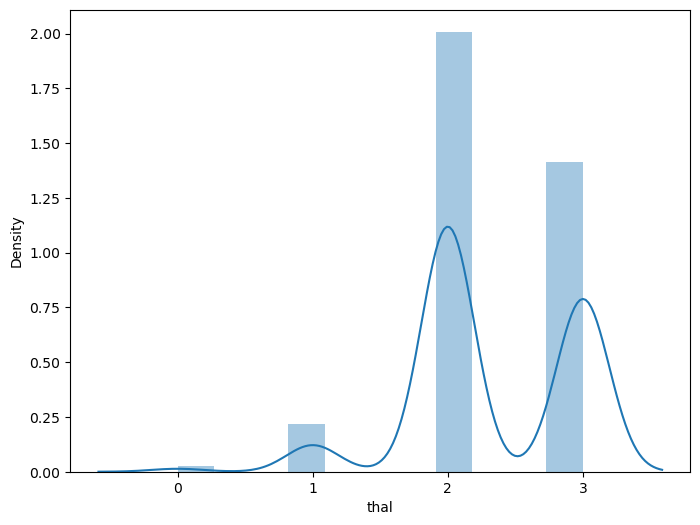

In [17]:
sns.distplot(datasetI["thal"])

In [18]:
print("tal: 3 = normal; 6 = defecto fijo; 7 = defecto reversible")

tal: 3 = normal; 6 = defecto fijo; 7 = defecto reversible


### Ahora hacemos una comparativa entre el nivel de Thalach y las cardiopatias resultantes mediante un Violinplot


Text(0, 0.5, 'Nivel de Thalach')

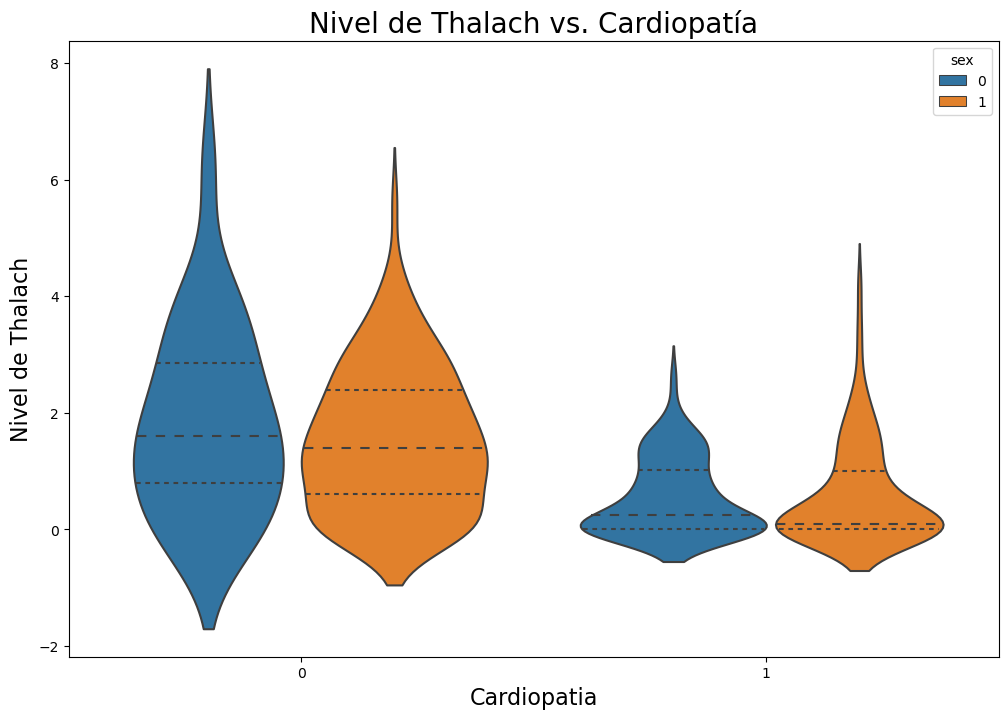

In [19]:
plt.figure(figsize=(12,8))
sns.violinplot(x= 'target', y= 'oldpeak',hue="sex", inner='quartile',data= datasetI )
plt.title("Nivel de Thalach vs. Cardiopatía",fontsize=20)
plt.xlabel("Cardiopatia", fontsize=16)
plt.ylabel("Nivel de Thalach", fontsize=16)


#### La forma general y la distribución de los pacientes negativos y positivos difieren bastante. Los pacientes positivos muestran una mediana más baja para el nivel de depresión ST y, por lo tanto, una gran distribución de sus datos está entre 0 y 2, mientras que los pacientes negativos están entre 1 y 3. Y no hay muchas diferencias entre los resultados de hombres y mujeres y femeninos

### Ahora podemos utilizar las visualizaciones para comprender mejor nuestros datos yestudiar cualquier procesamiento que queramos realizar.

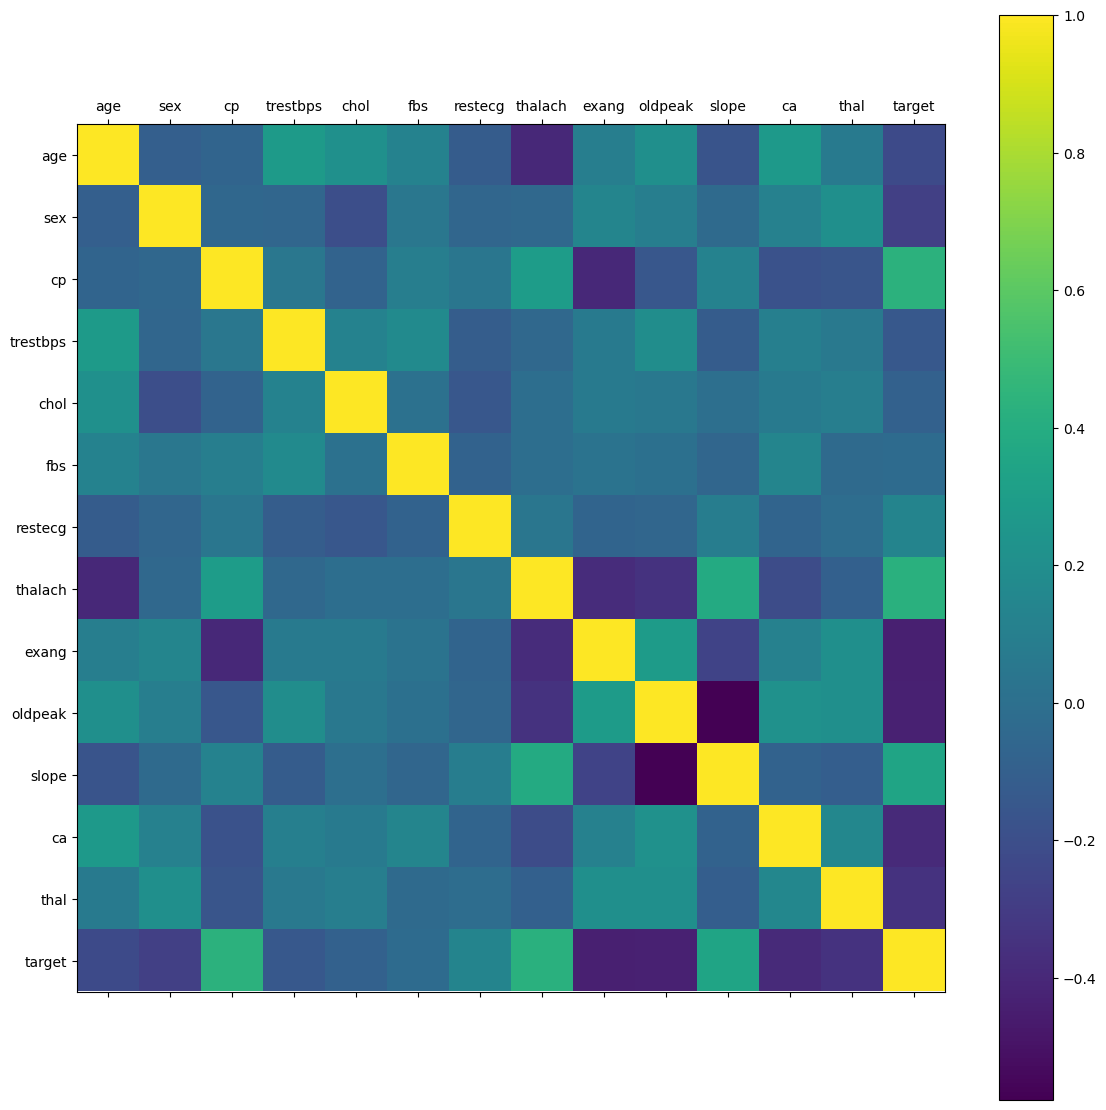

In [20]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(datasetI.corr())
plt.yticks(np.arange(datasetI.shape[1]), datasetI.columns)
plt.xticks(np.arange(datasetI.shape[1]), datasetI.columns)
plt.colorbar()

Si miramos la matriz de correlación anterior, es fácil ver que algunas características tienen una correlación negativa con el valor objetivo, mientras que otras tienen una correlación positiva.

### Echando un vistazo a los histogramas que vamos a generar, podemos ver que cada característica tiene un rango de distribución diferente. Por lo tanto, utilizar dicho escalamiento para nuestras futuras predicciones puede ser de gran utilidad para destacar las características categóricas 


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

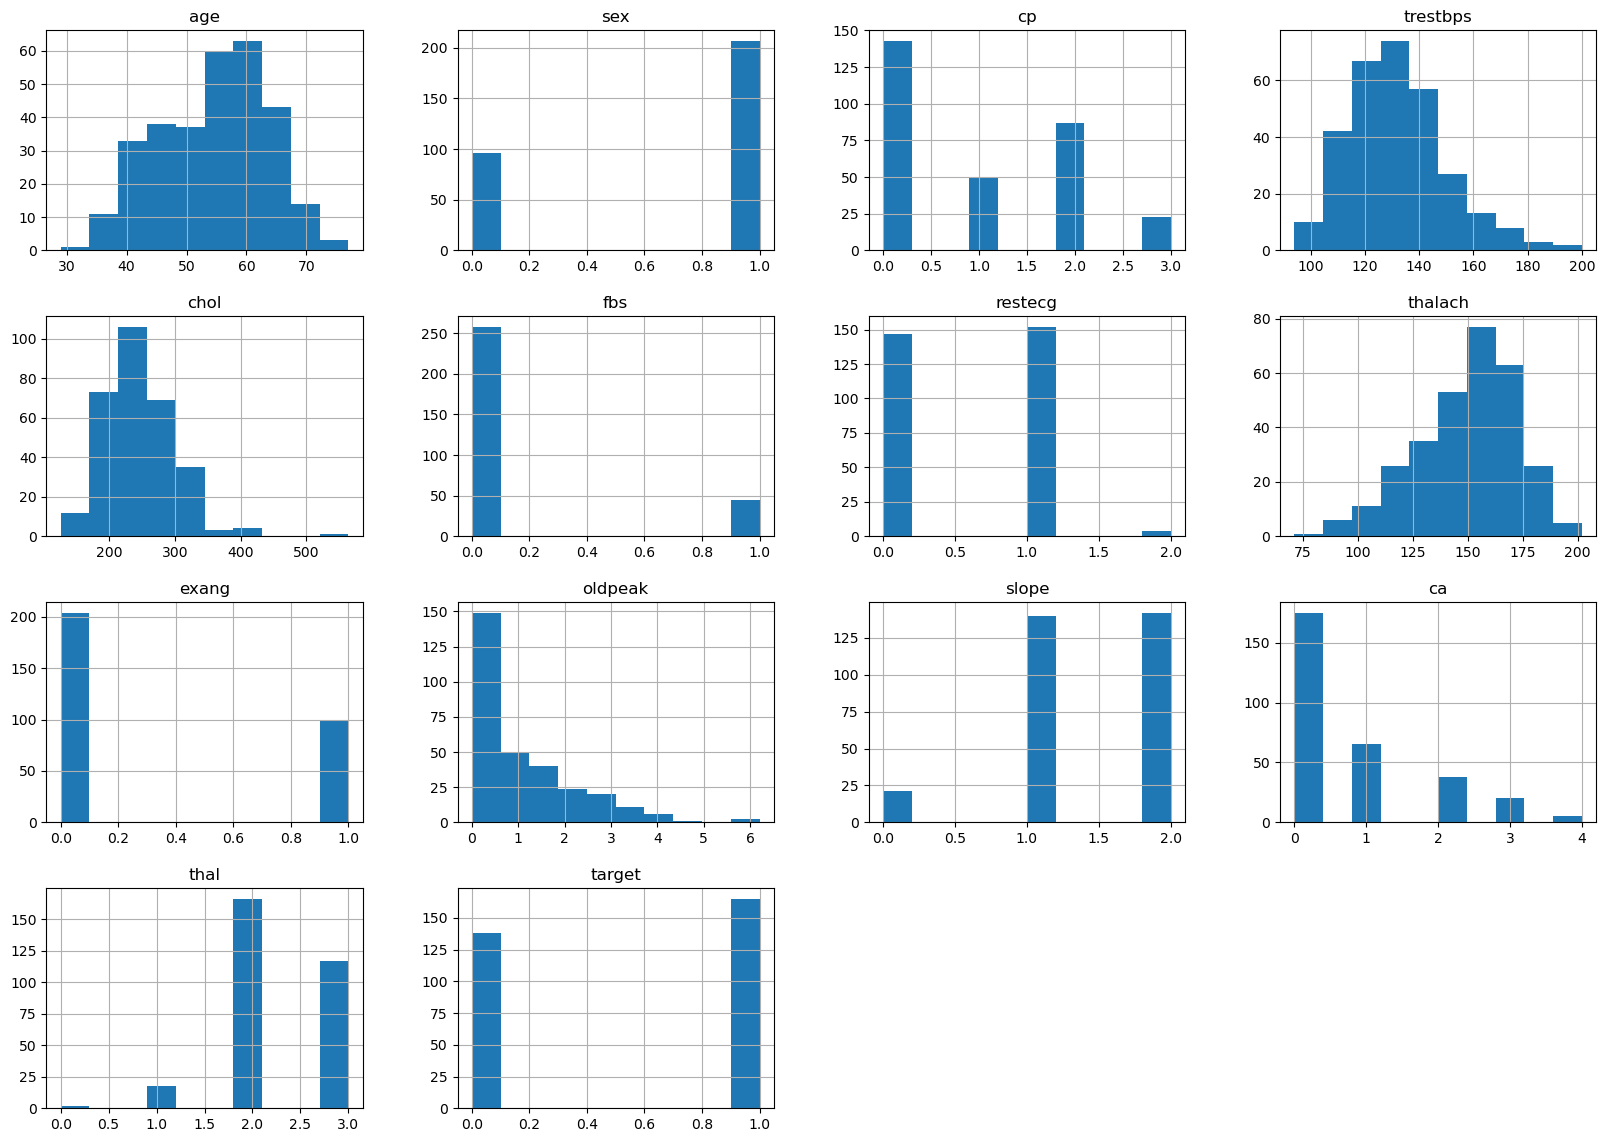

In [21]:
datasetI.hist()

### Hice un gráfico con variables continuas para profundizar en las relaciones. Es una buena forma de ver si existe una correlación positiva o negativa.

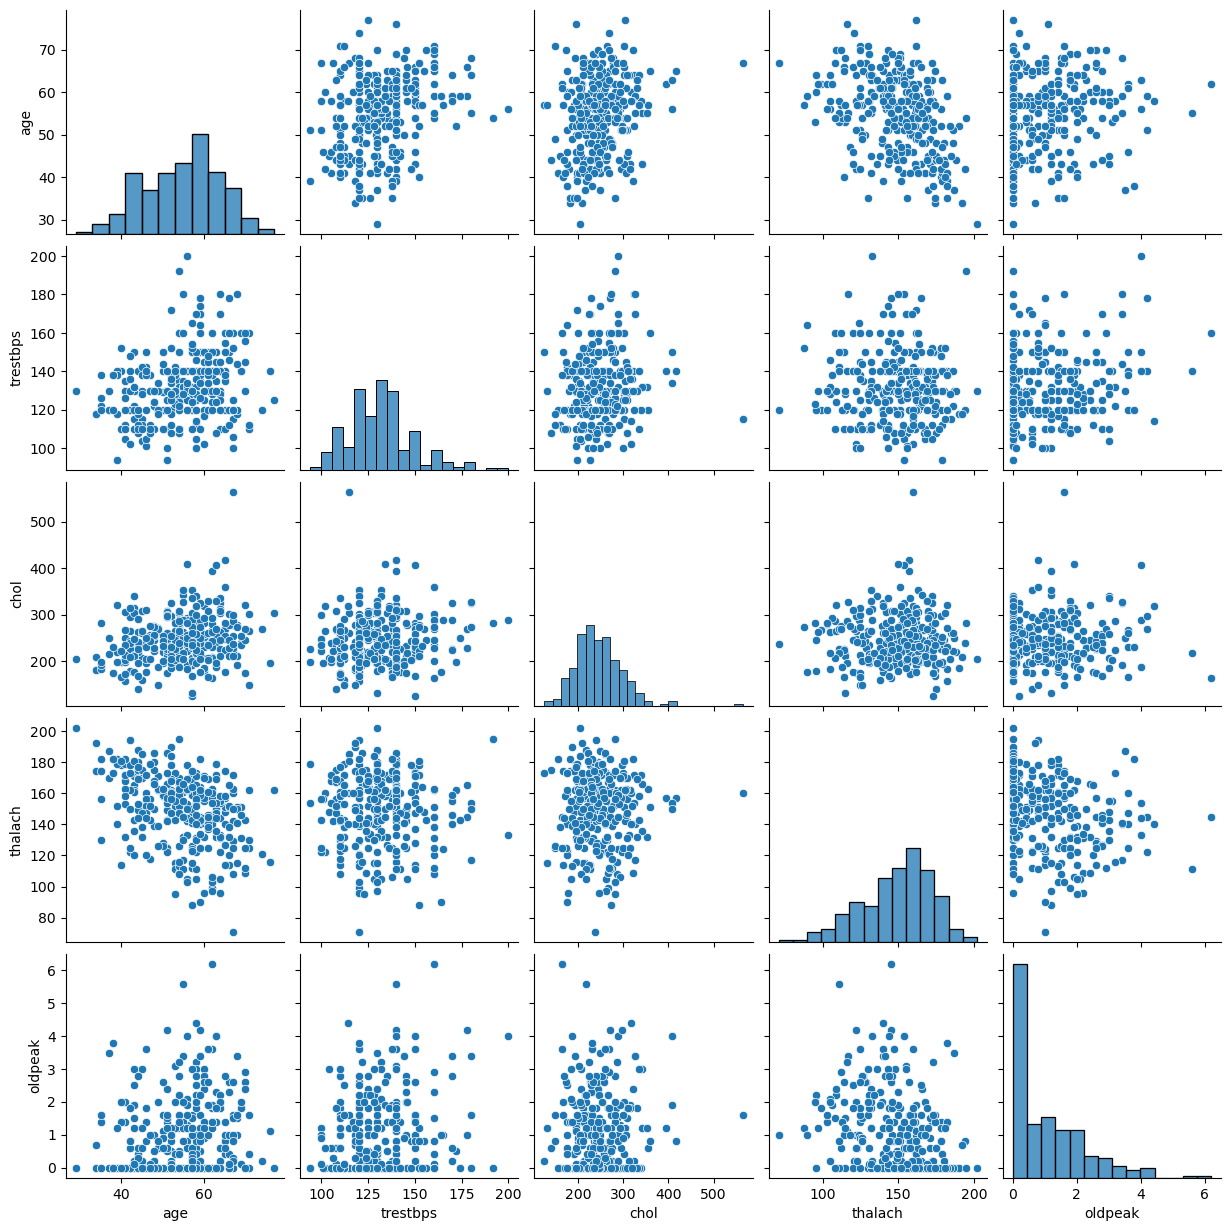

In [22]:
subData = datasetI[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(subData)

Text(36.818927083333335, 0.5, 'Depresión del ST')

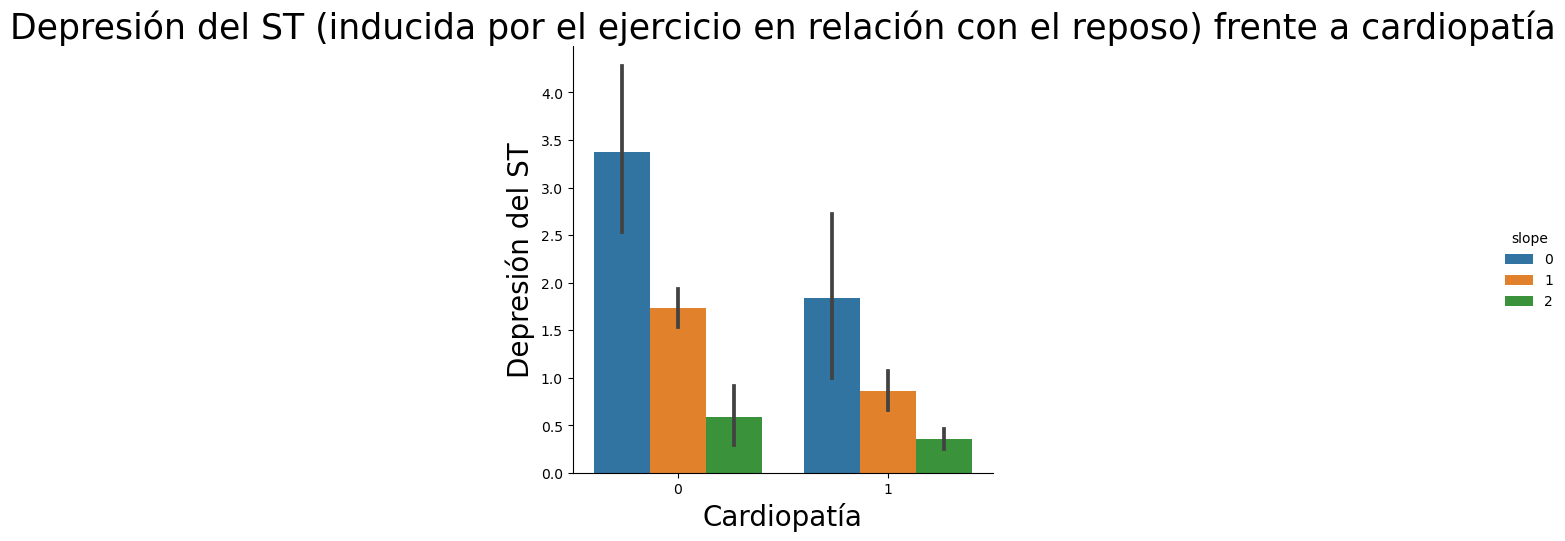

In [23]:
sns.catplot(x="target", y="oldpeak", hue="slope", kind="bar", data=datasetI);

plt.title('Depresión del ST (inducida por el ejercicio en relación con el reposo) frente a cardiopatía',size=25)
plt.xlabel('Cardiopatía',size=20)
plt.ylabel('Depresión del ST',size=20)

##### La depresión del segmento ST se produce porque cuando el ventrículo está en reposo y, por tanto, repolarizado. Si el trazo en el segmento ST es anormalmente bajo por debajo de la línea de base, esto puede conducir a esta Enfermedad Cardíaca. Esto es apoya el gráfico realizado porque una baja Depresión del ST hace que las personas tengan un mayor riesgo de padecer una enfermedad cardiaca. Mientras que una depresión alta del ST se considera normal y saludable. 

##### El matiz "pendiente", se refiere al segmento ST pico de ejercicio, con valores: 
##### 0: pendiente ascendente , 1: plano , 2: pendiente descendente. 

##### Tanto los pacientes con cardiopatía positiva como negativa muestran distribuciones iguales de las 3 categorías de pendientev

**********************************

## Recomendaciones en base a los Insight observados

#### De las características que examinamos, las 4 características más significativas que nos ayudaran a clasificar entre un diagnóstico positivo y negativo serán o entendemos que pueden ser:
* el tipo de dolor torácico (cp), 
* la frecuencia cardiaca máxima alcanzada (thalach), 
* el número de vasos principales (ca) 
* y la depresión del ST inducida por el ejercicio en relación con el reposo (oldpeak).

#### Lo que hara que nuestros algoritmos de aprendizaje puedan clasificar a los pacientes con cardiopatías. Diagnosticando correctamente a los pacientes, proporcionandoles la ayuda que necesiten. El diagnóstico preventiva de estas características puede evitar la aparición de síntomas más graves.

**************************************************

## Elección de un método de feature selection para reducir la dimensionalidad del dataset


#### * En nuestro caso vamos a avanzar con el Forward Selection

In [24]:

datasetI['target'] = datasetI.target
X = datasetI.drop("target", 1)       # feature matrix
y = datasetI['target']               # target feature
datasetI.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [25]:
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[303 rows x 13 columns]

In [26]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

####  Los pasos para la tecnica de selección son los siguientes;

##### 1. Elija un nivel de significancia (por ejemplo, SL = 0.05 con un 95% de confianza).

##### 2. Ajuste todos los modelos de regresión simple posibles considerando una característica a la vez. Los modelos totales 'n' son posibles. Seleccione la característica con el valor p más bajo.

##### 3. Ajuste todos los modelos posibles con una característica adicional agregada a las características seleccionadas anteriormente.

##### 4. Nuevamente, seleccione la función con un valor p mínimo. si $p_v <alpha$, vaya al Paso 3; de lo contrario, finalice el proceso.

In [27]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

#### Esta función anterior acepta datos, variable objetivo y nivel de significancia como argumentos y devuelve la lista final de características significativas basadas en valores p a través de la selección hacia adelante.

In [28]:
forward_selection(X, y)

['exang', 'ca', 'oldpeak', 'cp', 'sex', 'thal', 'thalach']

## Elección de un algoritmo de regresión o clasificación para entrenar con los datos elegidos 


##### Primero vamos a importar la función 'train_test_split del módulo 'model_selection' de la biblioteca scikit-learn (sklearn). Esta función la vamos a utilizar en el proceso de entrenamiento y evaluación de modelos de aprendizaje automático.

##### La idea es utilizar el conjunto de entrenamiento para ajustar el modelo a los datos y luego evaluar su rendimiento en el conjunto de prueba para obtener una estimación de su capacidad para generalizar

In [29]:
from sklearn.model_selection import train_test_split

predictors = datasetI.drop("target",axis=1)
target = datasetI["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

##### La función 'train_test_split' toma varios argumentos, siendo el más importante el conjunto de datos que se va a dividir
* 'test_size' o 'train_size', especifican la proporción de datos que se asignará al conjunto de prueba o entrenamiento, respectivamente

In [30]:
X_train.shape

(242, 13)

In [31]:
X_test.shape

(61, 13)

In [32]:
Y_train.shape

(242,)

In [33]:
Y_test.shape

(61,)

## Vamos a generar un cálculo de métricas para validar el modelo con el cual vamos a trabajar


#### La función 'accuracy_score' del módulo 'metrics' la vamos a utilizar para evaluar la precisión o el rendimiento del modelo

In [34]:
from sklearn.metrics import accuracy_score

*********************************

#### Con todo liso empezamos a probar los algoritmos

#### 1) Regresión Logistica

In [35]:
from sklearn.linear_model import LogisticRegression

lregression = LogisticRegression()
lregression.fit(X_train,Y_train)
Y_pred_lregression = lregression.predict(X_test)
Y_pred_lregression.shape

(61,)

In [36]:
score_lregression = round(accuracy_score(Y_pred_lregression,Y_test)*100,2)

print("La puntuación obtenida con la regresión logística es: "+str(score_lregression)+" %")

La puntuación obtenida con la regresión logística es: 85.25 %


#### 2) SVM

In [37]:
from sklearn import svm

sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)
Y_pred_svm.shape

(61,)

In [38]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("La puntuación obtenida con SVM es: "+str(score_svm)+" %")

La puntuación obtenida con SVM es: 81.97 %


#### 3) KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
Y_pred_knn.shape

(61,)

In [40]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("La puntuación obtenida con KNN es: "+str(score_knn)+" %")

La puntuación obtenida con KNN es: 67.21 %


#### 4) Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(200):
    dtree = DecisionTreeClassifier(random_state=x)
    dtree.fit(X_train,Y_train)
    Y_pred_dtree = dtree.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dtree,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
    
dtree = DecisionTreeClassifier(random_state=best_x)
dtree.fit(X_train,Y_train)
Y_pred_dtree = dtree.predict(X_test)
Y_pred_dtree.shape

(61,)

In [42]:
score_dtree = round(accuracy_score(Y_pred_dtree,Y_test)*100,2)

print("La puntuación obtenida con Decision Tree es: "+str(score_dtree)+" %")

La puntuación obtenida con Decision Tree es: 81.97 %


#### 5) Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0

for x in range(200):   ## Hay que utilizar un rango mayor, lo probe con 2000 pero llevaba 10min y no terminaba
    rforest = RandomForestClassifier(random_state=x)
    rforest.fit(X_train,Y_train)
    Y_pred_rforest = rforest.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rforest,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
rforest = RandomForestClassifier(random_state=best_x)
rforest.fit(X_train,Y_train)
Y_pred_rforest = rforest.predict(X_test)
Y_pred_rforest.shape

(61,)

In [44]:
score_rforest = round(accuracy_score(Y_pred_rforest,Y_test)*100,2)

print("La puntuación obtenida con Random Forest es: "+str(score_rforest)+" %")

La puntuación obtenida con Random Forest es: 88.52 %


## Conclusiones con respecto a los resultados obtenidos.


##### Ahoramos vamos a comparar todos los scores obtenidos para ver que modelo tiene mayor precisión y por ende mejor desempeño, considerando que ahora tenemos una selección más amplia

In [45]:
scores = [score_lregression,score_svm,score_knn,score_dtree,score_rforest]
algorithms = ["Logistic Regression","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The puntuación obtenida con "+algorithms[i]+" es: "+str(scores[i])+" %")

The puntuación obtenida con Logistic Regression es: 85.25 %
The puntuación obtenida con Support Vector Machine es: 81.97 %
The puntuación obtenida con K-Nearest Neighbors es: 67.21 %
The puntuación obtenida con Decision Tree es: 81.97 %
The puntuación obtenida con Random Forest es: 88.52 %


##### A diferencia de nuestra selección previa ahora vemos que Random Forest saca una leve ventaja sobre la regresión logistica, no obstante esto se debe a que reducimos nuestras vueltas, por lo cual la precisicón pudo haber sido mucho mayor y seria nuestro nuevo modelo a seleccionar

*****************************************

#### Probamos nuevamente nuestro Random Forest pero con un numero de prueba mayor para si produce mejores resultados

In [46]:
max_accuracy = 0

for x in range(500):  
    rforestII = RandomForestClassifier(random_state=x)
    rforestII.fit(X_train,Y_train)
    Y_pred_rforestII = rforestII.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rforestII,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
rforestII = RandomForestClassifier(random_state=best_x)
rforestII.fit(X_train,Y_train)
Y_pred_rforestII = rforestII.predict(X_test)

score_rforestII = round(accuracy_score(Y_pred_rforestII,Y_test)*100,2)

print("La puntuación obtenida con Random Forest es: "+str(score_rforestII)+" %")

La puntuación obtenida con Random Forest es: 90.16 %


#### Ahora vamos a hacer una comparación entre nuestro primer algoritmo seleccionado, 1) Decision Tree, nuestro segundo algoritmo seleccionado 2) Random Forest y finalmente nuestro 3) Random ForestII con un número mayor de vueltas y precisión

In [47]:
scores = [score_lregression,score_rforest, score_rforestII]
algorithms = ["Logistic Regression","Random Forest", "Random ForestII"]    

for i in range(len(algorithms)):
    print("The puntuación obtenida con "+algorithms[i]+" es: "+str(scores[i])+" %")

The puntuación obtenida con Logistic Regression es: 85.25 %
The puntuación obtenida con Random Forest es: 88.52 %
The puntuación obtenida con Random ForestII es: 90.16 %


### Nuestro algoritmo Random ForestII claramente ofrece la mayor precisión, un 90,16%. Cualquier precisión superior al 70% es buena, pero tenemos que ser cuidadosos ya que si una precisión es muy alta, podemos estar ante un sobreajuste.

### Y de las 13 características que examinamos en una primera instancia, nuestras 4 características más significativas que nos ayudan a clasificar entre un diagnóstico positivo y negativo son el tipo de dolor torácico (cp), la frecuencia cardiaca máxima alcanzada (thalach), el número de vasos principales (ca) y la depresión del ST inducida por el ejercicio en relación con el reposo (oldpeak). Esto también lo comprobamos aplicando un Forward selection que nos agrego algunas features más.

*************************************

##  Desafio API Publica

### En primera instancia cargue la información directamente de una URL a través de JSON para hacer una prueba con un Dataset relevante para mi desafio

In [48]:
import requests
import json
url='https://data.sandiegocounty.gov/resource/5sib-ba59.json'
df= requests.get(url)
print(df)

<Response [200]>


In [49]:
print((df.text))
df.text

[{"condition":"CHD/Stroke","outcome":"Death","year":"2017","geography":"San Diego County","geotype":"NA","geoname":"SAN DIEGO COUNTY","geoid":"99","region":"NA","district":"NA","total":"4231","totalrate":"127.59","aarate":"113.01","age25_44":"58","age25_44rate":"6.58","age45_64":"533","age45_64rate":"65.44","age65plus":"3635","age65plusrate":"783.72","total_male":"2241","total_malerate":"134.42","aa_totalmalerate":"142.40","age25_44_male":"45","age25_44_malerate":"9.92","age45_64_male":"388","age45_64_malerate":"96.61","age65plus_male":"1805","age65plus_malerate":"877.40","total_female":"1990","total_femalerate":"120.67","aa_totalfemalerate":"89.41","age25_44_female":"13","age25_44_femalerate":"3.03","age45_64_female":"145","age45_64_femalerate":"35.12","age45plus_female":"1975","age45plus_femalerate":"294.36","age65plus_female":"1830","age65plus_femalerate":"709.06","white_total":"2916","white_totalrate":"190.36","white_age25_44":"18","white_age25_44rate":"4.59","white_age45_64":"292"

'[{"condition":"CHD/Stroke","outcome":"Death","year":"2017","geography":"San Diego County","geotype":"NA","geoname":"SAN DIEGO COUNTY","geoid":"99","region":"NA","district":"NA","total":"4231","totalrate":"127.59","aarate":"113.01","age25_44":"58","age25_44rate":"6.58","age45_64":"533","age45_64rate":"65.44","age65plus":"3635","age65plusrate":"783.72","total_male":"2241","total_malerate":"134.42","aa_totalmalerate":"142.40","age25_44_male":"45","age25_44_malerate":"9.92","age45_64_male":"388","age45_64_malerate":"96.61","age65plus_male":"1805","age65plus_malerate":"877.40","total_female":"1990","total_femalerate":"120.67","aa_totalfemalerate":"89.41","age25_44_female":"13","age25_44_femalerate":"3.03","age45_64_female":"145","age45_64_femalerate":"35.12","age45plus_female":"1975","age45plus_femalerate":"294.36","age65plus_female":"1830","age65plus_femalerate":"709.06","white_total":"2916","white_totalrate":"190.36","white_age25_44":"18","white_age25_44rate":"4.59","white_age45_64":"292

In [50]:
texto = df.text
json.loads(texto)

[{'condition': 'CHD/Stroke',
  'outcome': 'Death',
  'year': '2017',
  'geography': 'San Diego County',
  'geotype': 'NA',
  'geoname': 'SAN DIEGO COUNTY',
  'geoid': '99',
  'region': 'NA',
  'district': 'NA',
  'total': '4231',
  'totalrate': '127.59',
  'aarate': '113.01',
  'age25_44': '58',
  'age25_44rate': '6.58',
  'age45_64': '533',
  'age45_64rate': '65.44',
  'age65plus': '3635',
  'age65plusrate': '783.72',
  'total_male': '2241',
  'total_malerate': '134.42',
  'aa_totalmalerate': '142.40',
  'age25_44_male': '45',
  'age25_44_malerate': '9.92',
  'age45_64_male': '388',
  'age45_64_malerate': '96.61',
  'age65plus_male': '1805',
  'age65plus_malerate': '877.40',
  'total_female': '1990',
  'total_femalerate': '120.67',
  'aa_totalfemalerate': '89.41',
  'age25_44_female': '13',
  'age25_44_femalerate': '3.03',
  'age45_64_female': '145',
  'age45_64_femalerate': '35.12',
  'age45plus_female': '1975',
  'age45plus_femalerate': '294.36',
  'age65plus_female': '1830',
  'age

### Y finalmente la información la cargamos en una DataFrame para poder trabajarla

In [51]:
jsondata=json.loads(texto)
df2=pd.DataFrame.from_dict(jsondata)
df2.head()

condition outcome  year               geography geotype  \
0  CHD/Stroke   Death  2017        San Diego County      NA   
1  CHD/Stroke   Death  2017          Central Region  Region   
2  CHD/Stroke   Death  2017       Central San Diego     SRA   
3  CHD/Stroke   Death  2017                Mid-City     SRA   
4  CHD/Stroke   Death  2017  Southeastern San Diego     SRA   

                  geoname geoid   region                  district total  ...  \
0        SAN DIEGO COUNTY    99       NA                        NA  4231  ...   
1                 CENTRAL     3  CENTRAL                        NA   590  ...   
2       CENTRAL SAN DIEGO     1  CENTRAL  Supervisorial District 4   206  ...   
3                MID-CITY     6  CENTRAL  Supervisorial District 4   187  ...   
4  SOUTHEASTERN SAN DIEGO     5  CENTRAL  Supervisorial District 4   212  ...   

  white_age0_14_male white_age0_14_malerate aian_age45_64_male  \
0                NaN                    NaN                NaN   
1                NaN                    NaN                NaN   
2                NaN                    NaN                NaN   
3                NaN                    NaN                NaN   
4                NaN                    NaN                NaN   

  aian_age45_64_malerate white_age15_24 white_age15_24rate hispanic_age0_14  \
0                    NaN            NaN                NaN              NaN   
1                    NaN            NaN                NaN              NaN   
2                    NaN            NaN                NaN              NaN   
3                    NaN            NaN                NaN              NaN   
4                    NaN            NaN                NaN              NaN   

  hispanic_age0_14rate hispanic_age15_24_male hispanic_age15_24_malerate  
0                  NaN                    NaN                        NaN  
1                  NaN                    NaN                        NaN  
2                  NaN                    NaN                        NaN  
3                  NaN                    NaN                        NaN  
4                  NaN                    NaN                        NaN  

[5 rows x 208 columns]

In [52]:
df2.shape

(1000, 208)

*********************************

## Desafio_Clase15 - Data Wrangling

#### Primero cambiaremos el nombre de las columnas de nuestro DataSet, para que la nomenclatura sea más entendible y posteriormente codificaremos las características en variables categóricas.

* [age] edad (#)
* [sex] sexo : 1= Masculino, 0= Femenino (Binario)
* [chest_pain] (cp)tipo de dolor torácico (4 valores -Ordinal):Valor 1: angina típica ,Valor 2: angina atípica, Valor 3: dolor no anginoso , Valor 4: asintomático 
* [resting_blood_pressure] (trestbps) presión arterial en reposo (#)
* [cholesterol] (chol) colesterol sérico en mg/dl (#)
* [fasting_blodd_sugar] (fbs)glucemia en ayunas > 120 mg/dl(Binario)(1 = verdadero; 0 = falso)
* [rest_ecg] (restecg) resultados electrocardiográficos en reposo(valores 0,1,2)
* [thalach] (thalach) frecuencia cardiaca máxima alcanzada(#)
* [exercise_induced_angina] (exang) angina inducida por el ejercicio (binario) (1 = sí; 0 = no)
* [st_depression] (oldpeak) = depresión del ST inducida por el ejercicio en relación con el reposo (#)
* [st_slope] (pendiente) del segmento ST pico del ejercicio (ordinal) (Valor 1: pendiente ascendente , Valor 2: plano , Valor 3: pendiente descendente )
* [number_of_vessels] (ca) número de vasos principales (0-3, ordinal) coloreados por fluoroscopia
* [maximum_heart_rate] (thal) frecuencia cardiaca máxima alcanzada - (Ordinal): 3 = normal; 6 = defecto fijo; 7 = defecto reversible

In [53]:
datasetFinal = pd.read_csv('dataset.csv')
datasetI.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [54]:
datasetFinal.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg','thalach',
       'exercise_induced_angina', 'st_depression', 'st_slope','number_of_vessels', 'maximum_heart_rate', 'target']

datasetFinal.head()

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   63    1                3                     145          233   
1   37    1                2                     130          250   
2   41    0                1                     130          204   
3   56    1                1                     120          236   
4   57    0                0                     120          354   

   fasting_blood_sugar  rest_ecg  thalach  exercise_induced_angina  \
0                    1         0      150                        0   
1                    0         1      187                        0   
2                    0         0      172                        0   
3                    0         1      178                        0   
4                    0         1      163                        1   

   st_depression  st_slope  number_of_vessels  maximum_heart_rate  target  
0            2.3         0                  0                   1       1  
1            3.5         0                  0                   2       1  
2            1.4         2                  0                   2       1  
3            0.8         2                  0                   2       1  
4            0.6         2                  0                   2       1

In [55]:
datasetFinal['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### Hacemos la conversión de las variables categoricas

In [56]:

datasetFinal['chest_pain_type'][datasetFinal['chest_pain_type'] == 0] = 'typical angina'
datasetFinal['chest_pain_type'][datasetFinal['chest_pain_type'] == 1] = 'atypical angina'
datasetFinal['chest_pain_type'][datasetFinal['chest_pain_type'] == 2] = 'non-anginal pain'
datasetFinal['chest_pain_type'][datasetFinal['chest_pain_type'] == 3] = 'asymptomatic'


datasetFinal['rest_ecg'][datasetFinal['rest_ecg'] == 0] = 'normal'
datasetFinal['rest_ecg'][datasetFinal['rest_ecg'] == 1] = 'ST-T wave abnormality'
datasetFinal['rest_ecg'][datasetFinal['rest_ecg'] == 2] = 'left ventricular hypertrophy'

datasetFinal['st_slope'][datasetFinal['st_slope'] == 0] = 'upsloping'
datasetFinal['st_slope'][datasetFinal['st_slope'] == 1] = 'flat'
datasetFinal['st_slope'][datasetFinal['st_slope'] == 2] = 'downsloping'

datasetFinal["sex"] = datasetFinal.sex.apply(lambda  x:'male' if x==1 else 'female')

#### Hacemos un count de "chest_pain_type" (Tipo de dolor en el pecho), luego de nuestra variable "rest_ecg" (Electrocradiograma en reposo) y finalmente de "st_slope" (ST pendiente en ejercicio máximo)

In [57]:
datasetFinal['chest_pain_type'].value_counts()

typical angina      143
non-anginal pain     87
atypical angina      50
asymptomatic         23
Name: chest_pain_type, dtype: int64

In [58]:
datasetFinal['rest_ecg'].value_counts()

ST-T wave abnormality           152
normal                          147
left ventricular hypertrophy      4
Name: rest_ecg, dtype: int64

In [59]:
datasetFinal['st_slope'].value_counts()

downsloping    142
flat           140
upsloping       21
Name: st_slope, dtype: int64

#### Vemos como quedo nuestro DataSet

In [60]:
datasetFinal.head()

age     sex   chest_pain_type  resting_blood_pressure  cholesterol  \
0   63    male      asymptomatic                     145          233   
1   37    male  non-anginal pain                     130          250   
2   41  female   atypical angina                     130          204   
3   56    male   atypical angina                     120          236   
4   57  female    typical angina                     120          354   

   fasting_blood_sugar               rest_ecg  thalach  \
0                    1                 normal      150   
1                    0  ST-T wave abnormality      187   
2                    0                 normal      172   
3                    0  ST-T wave abnormality      178   
4                    0  ST-T wave abnormality      163   

   exercise_induced_angina  st_depression     st_slope  number_of_vessels  \
0                        0            2.3    upsloping                  0   
1                        0            3.5    upsloping                  0   
2                        0            1.4  downsloping                  0   
3                        0            0.8  downsloping                  0   
4                        1            0.6  downsloping                  0   

   maximum_heart_rate  target  
0                   1       1  
1                   2       1  
2                   2       1  
3                   2       1  
4                   2       1

### Vamos a hacer una comprobación para ver si tenemos datos nulos

In [61]:
datasetFinal.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
thalach                    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
number_of_vessels          0
maximum_heart_rate         0
target                     0
dtype: int64

##### Tal como observamos, no tenemos entradas nulas en nuestro conjunto de datos

### Posteriormente hacemos un unique para ver la cantidad de valores únicos que tenemos en cada variable

In [62]:
datasetFinal.nunique(axis=0)

age                         41
sex                          2
chest_pain_type              4
resting_blood_pressure      49
cholesterol                152
fasting_blood_sugar          2
rest_ecg                     3
thalach                     91
exercise_induced_angina      2
st_depression               40
st_slope                     3
number_of_vessels            5
maximum_heart_rate           4
target                       2
dtype: int64

### Finalmente, vamos a hacer dos gráficos para entender la distribución de nuestra variable objetivo "target", y entender en lineas generales la población que presentan cardiopatias y cuales no

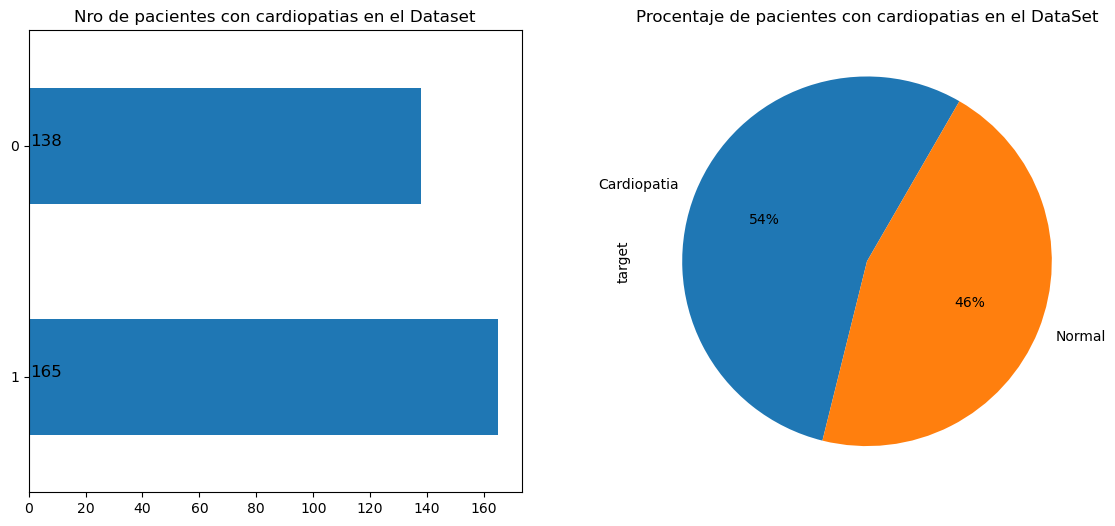

In [63]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = datasetFinal["target"].value_counts().plot(kind="barh" ,ax =ax1)
for i,j in enumerate(datasetFinal["target"].value_counts().values):
    ax1.text(.5,i,j,fontsize=12)
ax1.set(title = 'Nro de pacientes con cardiopatias en el Dataset')

ax2 = datasetFinal['target'].value_counts().plot.pie( x="Cardiopatias" ,y ='Nro de pacientes', 
                   autopct = "%1.0f%%",labels=["Cardiopatia","Normal"], startangle = 60,ax=ax2);
ax2.set(title = 'Procentaje de pacientes con cardiopatias en el DataSet')

plt.show()

********************************

## Desafio_Clase19 - Análisis bivariado

### Primero volvemos a cargar nuestro dataset

In [64]:
datasetI.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

#### Previamente ya habiamos realizado un heatmap para poder analizar la correlación que había entre variables, nos traemos dicho heatmap con algunas modificaciones;

<Axes: >

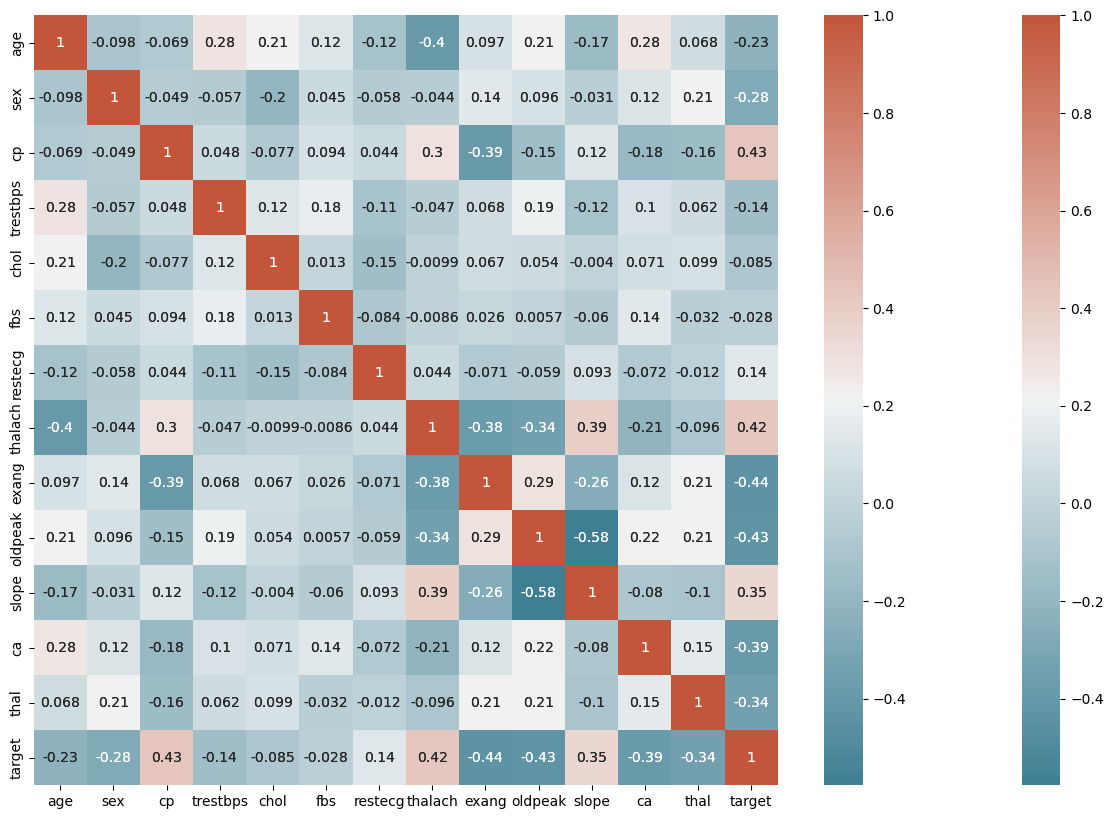

In [65]:
corr = datasetI.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

### Insight 1): 
#### Podemos ver que existe una correlación positiva entre el dolor torácico (cp) y y nuestra variable objetivo objetivo (target). Es lógico dado ya que a mayor dolor torácico, mayor probabilidad de padecer una enfermedad cardiaca. Cp (dolor en el pecho), es una característica ordinal con 4 valores: 
* Valor 0: angina típica,
* Valor 1: angina atípica, 
* Valor 2: dolor no anginoso, 
* Valor 3: asintomático.

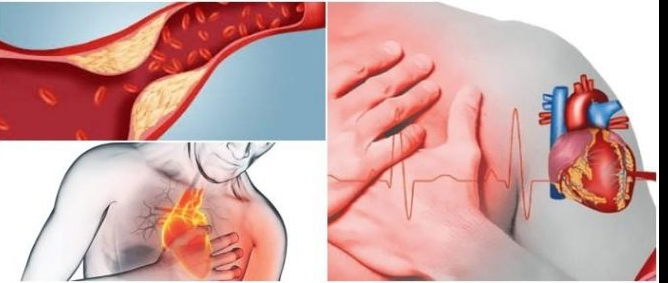

#### Además, podemos observar una correlación negativa entre la angina inducida por el ejercicio (exang) y nuestra variable objetivo (target). Tiene sentido ya que cuando se hace ejercicio, el corazón necesita más sangre, pero las arterias estrechas ralentizan el flujo sanguíneo.


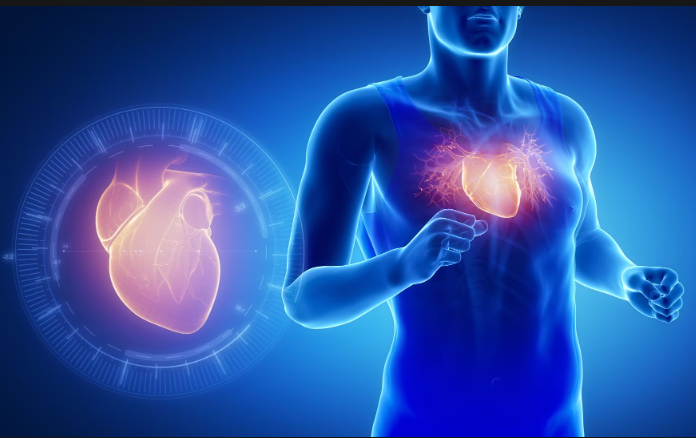

### Insight 2): A medida que aumenta la edad, aumentan las probabilidades de sufrir afecciones cardíacas?

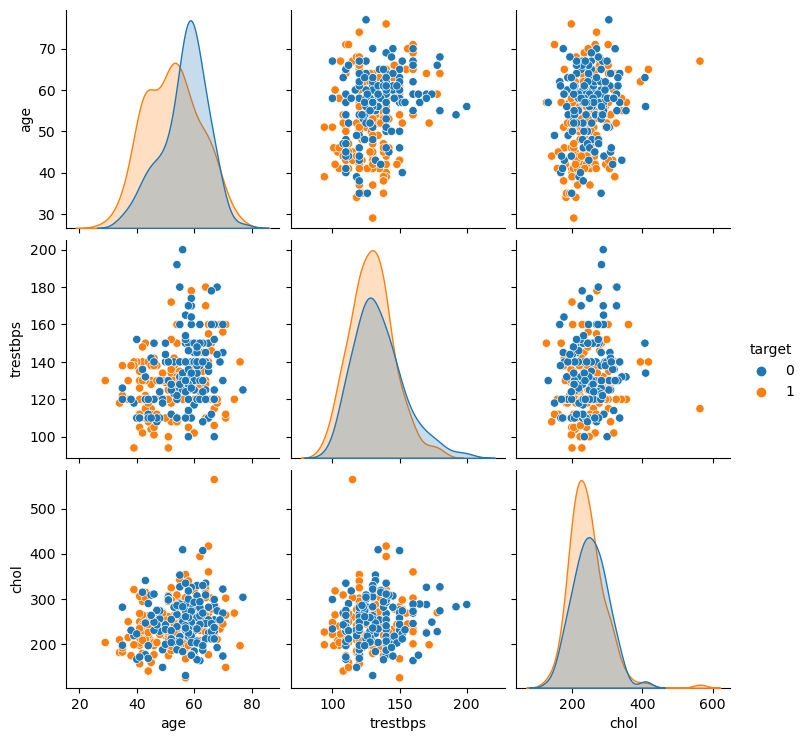

In [67]:
sns.pairplot(datasetI, hue = 'target', vars = ['age', 'trestbps', 'chol'] )

#### Podemos que a medida que aumenta la edad, aumentan las probabilidades de sufrir enfermedades cardíacas